In [1]:
from fitter import Fitter, get_common_distributions, get_distributions
import os
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import psycopg
from scipy.optimize import curve_fit
import scipy.stats as stats
from scipy.stats import epps_singleton_2samp as epps
import statsmodels
import statsmodels.api as sm
import seaborn as sns
import sqlalchemy
import psycopg_binary

Formatter for the visualization

In [2]:
def append_percentage(x, pos):
    del pos
    return str(int(x))+str('%')

def formatter(x, pos):
    del pos
    return str(int(x*100))+str('%')

In [3]:
# sns.set(
#     context="paper",
#     style="darkgrid",
#     palette="pastel",
#     rc={"figure.dpi": 150}
# )
sns.set_context("paper", font_scale=1.5)

In [3]:
def use_fitter(data):
    # Initialize the fitter object
    # f = Fitter(data, distributions='common')
    f = Fitter(data)

    # Fit common distributions
    f.fit(get_common_distributions())

    # Print the summary of the fitted distributions
    print(f.summary())

    print (f.get_best(method = 'sumsquare_error'))
    print (f.get_best(method = 'aic'))
    print (f.get_best(method = 'bic'))
    # print (f.get_best(method = 'kl_div'))
    print (f.get_best(method = 'ks_statistic'))
    print (f.get_best(method = 'ks_pvalue'))

# PostFixExposureTimeCombined

In [3]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined.csv")
print (data_file)
df_combined = pd.read_csv(data_file,
                header=0,
                sep=';',
                on_bad_lines='skip',
                usecols=['system_name', 'total_duration', 'total_post_fix_exposure_time', 'ratio', 'avg_total_duration', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_combined.shape[0]
print (df_combined.shape)
display(df_combined.head())

/Users/imranur/Research/security-metrics/code/visualize-data/../../data/post-fix-exposure-time-from-db/post_fix_exposure_time_combined.csv
(1606643, 7)


,system_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,CARGO,310,0,0.0,310.0,0.0,0.0
1,CARGO,1650,0,0.0,1650.0,0.0,0.0
2,CARGO,3207,0,0.0,1603.5,0.0,0.0
3,CARGO,198,0,0.0,198.0,0.0,0.0
4,CARGO,2407,0,0.0,2407.0,0.0,0.0


In [4]:
df_combined = df_combined.dropna()

In [5]:
df_combined = df_combined[ df_combined.total_post_fix_exposure_time != 0 ]
df_combined

,system_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
10148,NPM,3460,909,0.262717,1153.333333,303.000000,0.262717
10153,NPM,17940,1479,0.082441,944.210526,77.842105,0.082441
10156,NPM,3036,909,0.299407,1012.000000,303.000000,0.299407
10168,NPM,680,428,0.629412,680.000000,428.000000,0.629412
10169,NPM,8783,613,0.069794,731.916667,51.083333,0.069794
...,...,...,...,...,...,...,...
1606456,PYPI,47875,408,0.008522,1196.875000,10.200000,0.008522
1606548,PYPI,10960,23,0.002099,1565.714286,3.285714,0.002099
1606557,PYPI,1703,621,0.364651,851.500000,310.500000,0.364651
1606567,PYPI,1097,330,0.300820,365.666667,110.000000,0.300820


/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_73492/3845068828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined, y='avg_post_fix_exposure_time', x='system_name', inner='quartile',


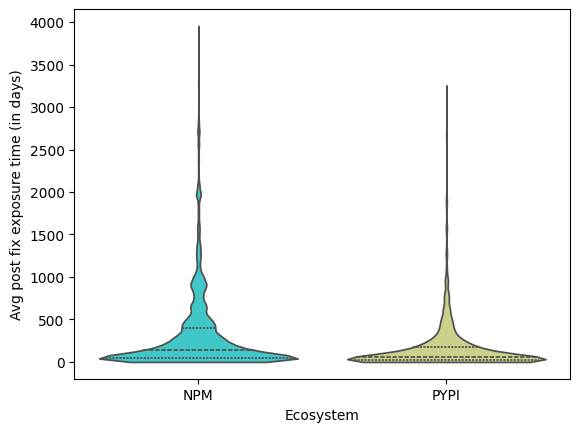

In [6]:
ax = sns.violinplot(data=df_combined, y='avg_post_fix_exposure_time', x='system_name', inner='quartile',
                    palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined.pdf")

ax.set_ylabel('Avg post fix exposure time (in days)')
ax.set_xlabel('Ecosystem')
# plt.title('Time out of date (all pkgs)\n')
plt.savefig(data_file)


/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_73492/2579169397.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined, y='avg_ratio', x='system_name', inner='quartile',


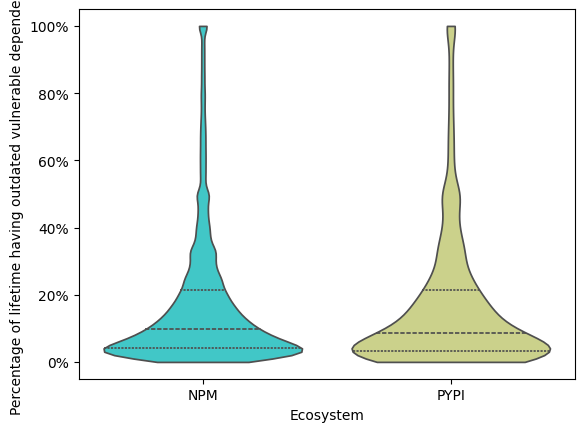

In [7]:
ax = sns.violinplot(data=df_combined, y='avg_ratio', x='system_name', inner='quartile',
                    palette='rainbow', cut=0)
# plt.show()
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_ratio.pdf")

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Percentage of lifetime having outdated vulnerable dependency')
ax.set_xlabel('Ecosystem')
# plt.title('Time out of date (all pkgs)\n')
plt.savefig(data_file)

In [8]:
for system_name in df_combined.system_name.unique():
    print (system_name)

NPM
PYPI


Cumulative Percentage Graph

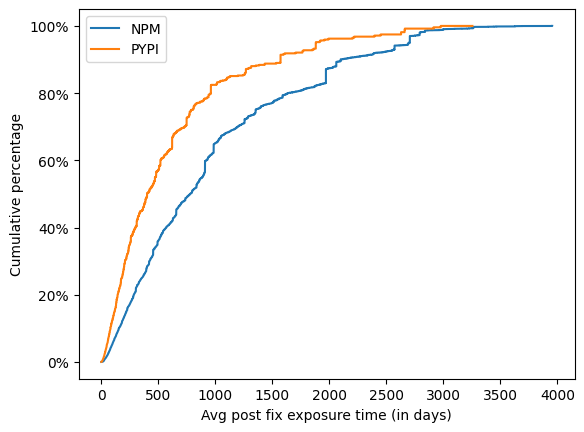

In [9]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "cum_percentage_pfet.pdf")

for system_name in df_combined.system_name.unique():
    df_cpg = df_combined[df_combined['system_name']==system_name].sort_values(by='avg_post_fix_exposure_time')
    df_cpg['cumulative_sum'] = df_cpg['avg_post_fix_exposure_time'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_post_fix_exposure_time'].sum()
    plt.plot(df_cpg['avg_post_fix_exposure_time'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
plt.xlabel('Avg post fix exposure time (in days)')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph')
plt.legend()
plt.savefig(data_file)

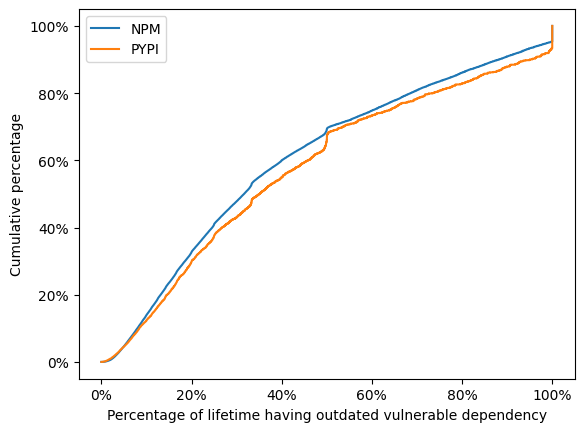

In [10]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "cum_percentage_ratio.pdf")

for system_name in df_combined.system_name.unique():
    df_cpg = df_combined[df_combined['system_name']==system_name].sort_values(by='avg_ratio')
    df_cpg['cumulative_sum'] = df_cpg['avg_ratio'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_ratio'].sum()
    plt.plot(df_cpg['avg_ratio'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Percentage of lifetime having outdated vulnerable dependency')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph')
plt.legend()
plt.savefig(data_file)

# PostFixExposureTimeMaintained

In [4]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained.csv")
print (data_file)
df_combined_maintained = pd.read_csv(data_file,
                header=0,
                sep=';',
                on_bad_lines='skip',
                usecols=['system_name', 'total_duration', 'total_post_fix_exposure_time', 'ratio', 'avg_total_duration', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_combined_maintained.shape[0]
print (df_combined_maintained.shape)
display(df_combined_maintained.head())

/Users/imranur/Research/security-metrics/code/visualize-data/../../data/post-fix-exposure-time-from-db/post_fix_exposure_time_combined_maintained.csv
(224553, 7)


,system_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,CARGO,375,93,0.248000,375.0,93.0,0.248000
1,CARGO,1219,549,0.450369,1219.0,549.0,0.450369
2,CARGO,187,187,1.000000,187.0,187.0,1.000000
3,CARGO,826,246,0.297821,826.0,246.0,0.297821
4,CARGO,1319,549,0.416224,1319.0,549.0,0.416224


In [5]:
df_combined_maintained = df_combined_maintained.dropna()

In [6]:
df_combined_maintained = df_combined_maintained[ df_combined_maintained.total_post_fix_exposure_time != 0 ]
df_combined_maintained

,system_name,total_duration,total_post_fix_exposure_time,ratio,avg_total_duration,avg_post_fix_exposure_time,avg_ratio
0,CARGO,375,93,0.248000,375.0,93.0,0.248000
1,CARGO,1219,549,0.450369,1219.0,549.0,0.450369
2,CARGO,187,187,1.000000,187.0,187.0,1.000000
3,CARGO,826,246,0.297821,826.0,246.0,0.297821
4,CARGO,1319,549,0.416224,1319.0,549.0,0.416224
...,...,...,...,...,...,...,...
224548,PYPI,1835,408,0.222343,1835.0,408.0,0.222343
224549,PYPI,1958,23,0.011747,1958.0,23.0,0.011747
224550,PYPI,850,621,0.730588,850.0,621.0,0.730588
224551,PYPI,363,330,0.909091,363.0,330.0,0.909091


In [7]:
df_combined_maintained.groupby(by=['system_name']).describe()

total_duration                                                   \
                     count         mean          std   min      25%     50%   
system_name                                                                   
CARGO                313.0  1106.038339   855.251091  23.0   467.00   944.0   
NPM               219310.0  2610.268100  2550.763285   1.0  1189.00  2002.0   
PYPI                4930.0  1207.042596  1168.258699   1.0   540.25   907.0   

                               total_post_fix_exposure_time               ...  \
                 75%       max                        count         mean  ...   
system_name                                                               ...   
CARGO        1496.00    5243.0                        313.0   386.376997  ...   
NPM          3028.00  113288.0                     219310.0  1386.048206  ...   
PYPI         1504.25   16391.0                       4930.0   559.637323  ...   

            avg_post_fix_exposure_time         avg_ratio                      \
                                   75%     max     count      mean       std   
system_name                                                                    
CARGO                            615.0  2545.0     313.0  0.345964  0.239240   
NPM                             1256.0  4295.0  219310.0  0.550687  0.270574   
PYPI                             621.0  3301.0    4930.0  0.508625  0.326434   

                                                          
                  min       25%       50%       75%  max  
system_name                                               
CARGO        0.001576  0.151951  0.340076  0.446961  1.0  
NPM          0.000267  0.333333  0.559471  0.755079  1.0  
PYPI         0.000548  0.200685  0.499059  0.800511  1.0  

[3 rows x 48 columns]

Fitting 111 distributions:   0%|          | 0/111 [00:00<?, ?it/s]2024-02-01 10:58:31.509 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-02-01 10:58:31.600 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=8.7e-05)
Fitting 111 distributions:   2%|▏         | 2/111 [00:00<00:07, 14.29it/s]2024-02-01 10:58:31.631 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=5.6e-05)
2024-02-01 10:58:31.651 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=8.6e-05)
2024-02-01 10:58:31.678 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted alpha distribution with error=0.000676)
2024-02-01 10:58:31.689 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted arcsine distribution with error=8.5e-05)
2024-02-01 10:58:31.695 | INFO     | fitter.fitter:_fit_single_distributio

            sumsquare_error          aic          bic  kl_div  ks_statistic  \
loglaplace         0.000053  1971.186093  1982.424703     inf      0.170616   
gennorm            0.000054  2100.598665  2111.837275     inf      0.232031   
genextreme         0.000055  1923.562075  1934.800685     inf      0.145224   
invgamma           0.000055  1925.555168  1936.793777     inf      0.148232   
nct                0.000055  1938.596370  1953.581182     inf      0.135789   

               ks_pvalue  
loglaplace  1.953663e-08  
gennorm     2.667527e-15  
genextreme  3.176411e-06  
invgamma    1.815039e-06  
nct         1.703940e-05  
{'loglaplace': {'c': 1.017515537242372, 'loc': -0.44838724512377615, 'scale': 161.44838050889211}}
{'vonmises': {'kappa': 0.37174314227060823, 'loc': -1.4471222657084581, 'scale': 1}}
{'vonmises': {'kappa': 0.37174314227060823, 'loc': -1.4471222657084581, 'scale': 1}}
{'betaprime': {'a': 0.9214557269208141, 'b': 3.6039495893741735, 'loc': 1.9999999983851107, 's

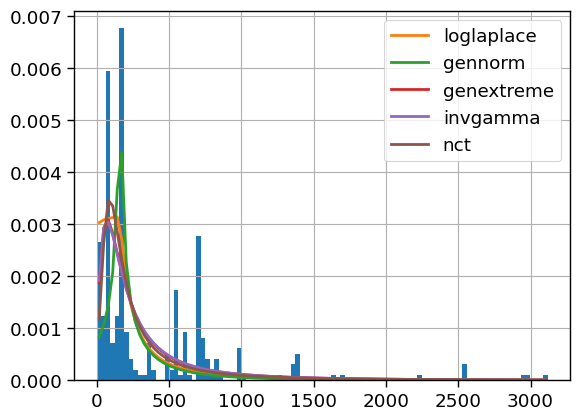

In [9]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'total_post_fix_exposure_time'].sort_values().to_numpy())

Fitting 111 distributions:   3%|▎         | 3/111 [00:30<21:03, 11.70s/it]2024-02-01 11:00:44.942 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-02-01 11:00:44.949 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▍         | 5/111 [00:30<09:02,  5.11s/it]2024-02-01 11:00:44.961 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-02-01 11:00:44.968 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
2024-02-01 11:00:44.980 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 111 distributions:   6%|▋         | 7/111 [00:30<04:57,  2.86s/it]2024-02-01 11:00:44.980 | WARNING  | fitter.fitter:_fit_single_distribution:34

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm      5.844858e-08  3343.583281  3374.478006     inf      0.072975   
expon        9.780993e-08  4893.899502  4914.495985     inf      0.079694   
pareto       1.012148e-07  3870.137490  3901.032214     inf      0.084406   
cauchy       1.236575e-07  2895.651372  2916.247855     inf      0.159838   
gumbel_r     1.604160e-07  7045.922036  7066.518519     inf      0.160363   

          ks_pvalue  
lognorm         0.0  
expon           0.0  
pareto          0.0  
cauchy          0.0  
gumbel_r        0.0  
{'lognorm': {'s': 0.850916415718492, 'loc': -129.02337871008422, 'scale': 1058.9473237304892}}
{'vonmises': {'kappa': 0.3238262482922702, 'loc': -2.392860226981533, 'scale': 1}}
{'vonmises': {'kappa': 0.3238262482922702, 'loc': -2.392860226981533, 'scale': 1}}
{'lognorm': {'s': 0.850916415718492, 'loc': -129.02337871008422, 'scale': 1058.9473237304892}}
{'cauchy': {'loc': 822.2754084608644, 'scale': 45

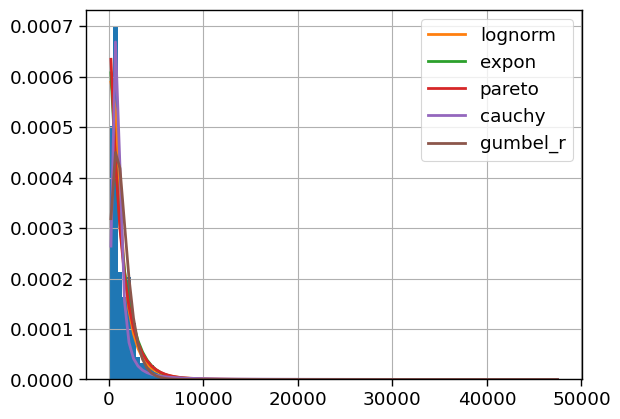

In [10]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='NPM', 'total_post_fix_exposure_time'].sort_values().to_numpy())

Fitting 111 distributions:   2%|▏         | 2/111 [00:15<16:13,  8.93s/it]2024-02-01 11:06:32.557 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-02-01 11:06:32.576 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▌         | 6/111 [00:31<06:04,  3.47s/it]2024-02-01 11:06:32.629 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED bradford distribution (taking more than 30 seconds)
2024-02-01 11:06:32.638 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
Fitting 111 distributions:  21%|██        | 23/111 [01:02<01:16,  1.16it/s]2024-02-01 11:07:04.657 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED fatiguelife distribution (taking more than 30 seconds)
2024-02-01 11:07:04.749 | WARNING  | fitter.fitter:_fit_single_dist

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm      7.989378e-07  2414.694598  2434.203880     inf      0.052803   
pareto       1.008139e-06  2523.753545  2543.262828     inf      0.058997   
expon        1.044724e-06  3008.332258  3021.338447     inf      0.091429   
moyal        2.281100e-06  3481.622402  3494.628590     inf      0.138029   
gumbel_r     2.790530e-06  3748.835507  3761.841695     inf      0.146394   

             ks_pvalue  
lognorm   2.184815e-12  
pareto    2.337029e-15  
expon     2.592311e-36  
moyal     2.149341e-82  
gumbel_r  1.120206e-92  
{'lognorm': {'s': 1.053195739733549, 'loc': -30.421911159283926, 'scale': 351.97826635497296}}
{'vonmises': {'kappa': 0.02028870929764408, 'loc': -3.05893719876274, 'scale': 1}}
{'vonmises': {'kappa': 0.02028870929764408, 'loc': -3.05893719876274, 'scale': 1}}
{'lognorm': {'s': 1.053195739733549, 'loc': -30.421911159283926, 'scale': 351.97826635497296}}
{'vonmises': {'kappa': 0.020288

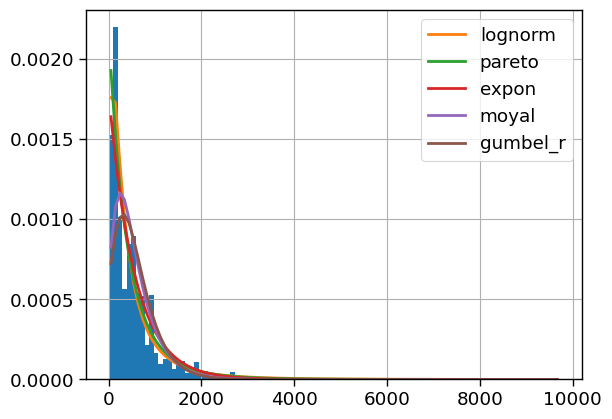

In [11]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='PYPI', 'total_post_fix_exposure_time'].sort_values().to_numpy())

Fitting 111 distributions:   2%|▏         | 2/111 [00:30<32:30, 17.89s/it]2024-02-01 11:12:26.498 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-02-01 11:12:26.515 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
Fitting 111 distributions:   3%|▎         | 3/111 [00:30<17:39,  9.81s/it]2024-02-01 11:12:26.517 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED anglit distribution (taking more than 30 seconds)
2024-02-01 11:12:26.525 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED alpha distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▌         | 6/111 [00:31<05:26,  3.11s/it]2024-02-01 11:12:26.591 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED bradford distribution (taking more than 30 seconds)
2024-02-01 11:12:26.673 | WARNING  | fitter.fitter:_fit_single_distribution:34

          sumsquare_error          aic          bic  kl_div  ks_statistic  \
lognorm      5.645322e-08  3331.042663  3362.008264     inf      0.072775   
expon        9.169726e-08  4940.321877  4960.965611     inf      0.080939   
pareto       9.504934e-08  3840.495164  3871.460766     inf      0.080665   
gumbel_r     1.593863e-07  7091.727231  7112.370965     inf      0.159008   
laplace      1.717040e-07  6719.459924  6740.103658     inf      0.178034   

          ks_pvalue  
lognorm         0.0  
expon           0.0  
pareto          0.0  
gumbel_r        0.0  
laplace         0.0  
{'lognorm': {'s': 0.8629201014500101, 'loc': -124.28968042040269, 'scale': 1033.1073487833}}
{'vonmises': {'kappa': 0.3167462863543087, 'loc': -2.392419494482062, 'scale': 1}}
{'vonmises': {'kappa': 0.3167462863543087, 'loc': -2.392419494482062, 'scale': 1}}
{'lognorm': {'s': 0.8629201014500101, 'loc': -124.28968042040269, 'scale': 1033.1073487833}}
{'expon': {'loc': 1.0, 'scale': 1365.5111577222303}}


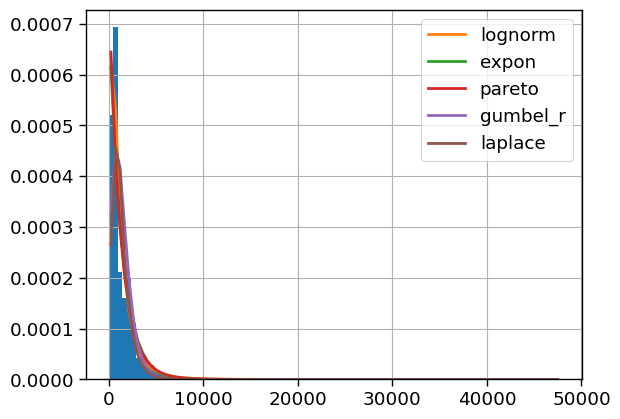

In [12]:
use_fitter(df_combined_maintained['total_post_fix_exposure_time'].sort_values().to_numpy())

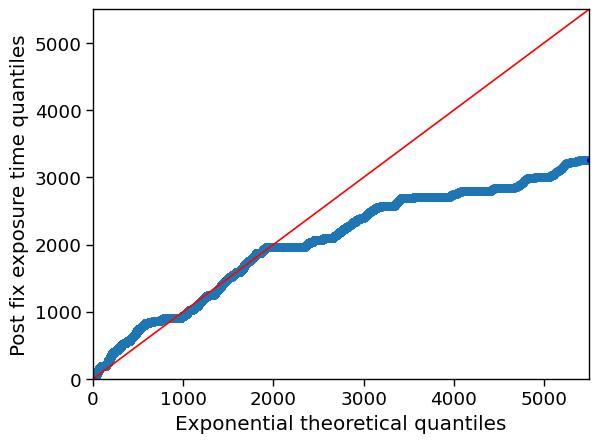

In [8]:
# fig, ax = plt.subplots(figsize=(6.4, 3.2))
loc, scale = stats.expon.fit(df_combined_maintained['avg_post_fix_exposure_time'].sort_values().to_numpy())
h= sm.qqplot(df_combined_maintained['avg_post_fix_exposure_time'].sort_values().to_numpy(),
             stats.expon, loc=loc, scale=scale, line='45', markerfacecolor='b')
h.axes[0].set_xlim([0, 5500])
h.axes[0].set_ylim([0, 5500])
h.axes[0].set_xlabel('Exponential theoretical quantiles')
h.axes[0].set_ylabel('Post fix exposure time quantiles')
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained_qq_plot.png")
plt.savefig(data_file, dpi=300, bbox_inches='tight')

/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_32503/3693276788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', y='system_name', inner='quartile',


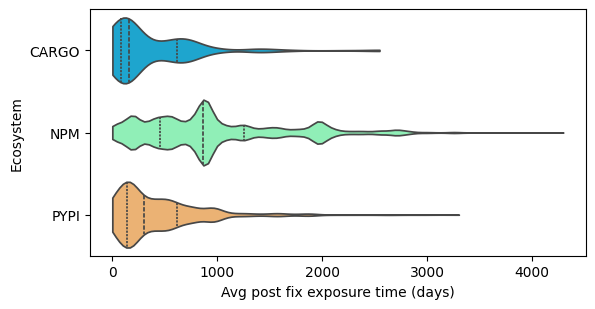

In [8]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.violinplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', y='system_name', inner='quartile',
                    palette='rainbow', cut=0)

ax.set_xlabel('Avg post fix exposure time (days)')
ax.set_ylabel('Ecosystem')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

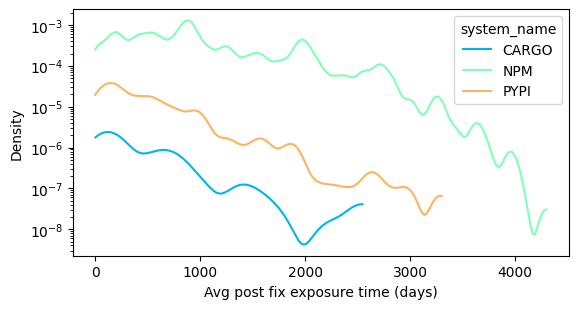

In [10]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained_kde.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.kdeplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', hue='system_name',
                palette='rainbow', cut=0)

ax.set_ylabel('Density')
ax.set_xlabel('Avg post fix exposure time (days)')
ax.set_yscale('log')
plt.savefig(data_file, bbox_inches='tight')

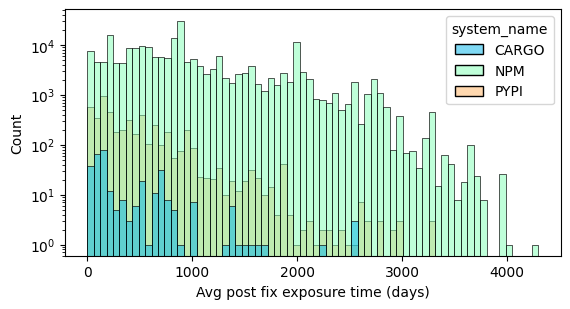

In [11]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained_hist.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.histplot(data=df_combined_maintained, x='avg_post_fix_exposure_time', hue='system_name',
                palette='rainbow', bins=70)
# ax.set_ylabel('Density')
ax.set_xlabel('Avg post fix exposure time (days)')
ax.set_yscale('log')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

Fitting 111 distributions:   3%|▎         | 3/111 [00:02<01:09,  1.56it/s]2024-02-01 11:19:08.852 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cosine distribution with error=256.541273)
2024-02-01 11:19:08.884 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted cauchy distribution with error=258.550111)
Fitting 111 distributions:   9%|▉         | 10/111 [00:05<00:45,  2.24it/s]2024-02-01 11:19:09.610 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted beta distribution with error=242.738327)
2024-02-01 11:19:09.957 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted dweibull distribution with error=241.934447)
Fitting 111 distributions:  19%|█▉        | 21/111 [00:08<00:27,  3.26it/s]2024-02-01 11:19:14.087 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gamma distribution with error=246.520935)
2024-02-01 11:19:14.385 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted exponweib distribution with 

                 sumsquare_error        aic        bic  kl_div  ks_statistic  \
rel_breitwigner       236.407822  87.589177  98.827787     inf      0.081989   
kappa3                238.267504  78.673773  89.912382     inf      0.090519   
mielke                239.167550  83.281470  98.266283     inf      0.103530   
foldnorm              240.099298  63.167245  74.405855     inf      0.075974   
halfgennorm           240.466007  59.942888  71.181498     inf      0.081899   

                 ks_pvalue  
rel_breitwigner   0.028071  
kappa3            0.011083  
mielke            0.002249  
foldnorm          0.051153  
halfgennorm       0.028333  
{'rel_breitwigner': {'rho': 0.5597414123588662, 'loc': 0.0015760440193908166, 'scale': 0.583298028911523}}
{'uniform': {'loc': 0.0015760441292356, 'scale': 0.9984239558707644}}
{'uniform': {'loc': 0.0015760441292356, 'scale': 0.9984239558707644}}
{'foldnorm': {'c': 0.937406198372555, 'loc': 0.0015760436876446574, 'scale': 0.30579162438030655}}

/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be

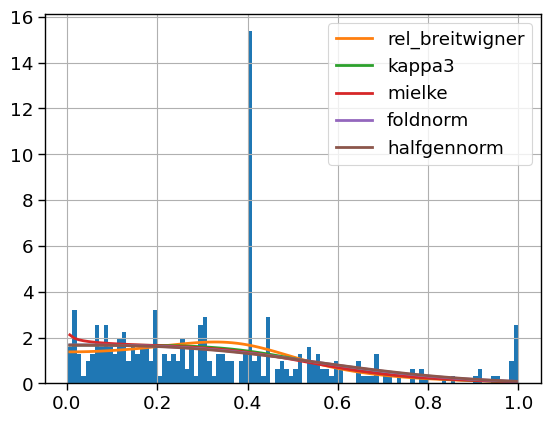

In [13]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='CARGO', 'avg_ratio'].sort_values().to_numpy())

/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_outpu

          sumsquare_error        aic        bic    kl_div  ks_statistic  \
powerlaw        53.846606  11.035498  41.930222  0.099405      0.075236   
uniform         57.831362   3.946617  24.543100  0.112557      0.086771   
norm            60.947913  43.591899  64.188383  0.087770      0.048397   
vonmises        61.171503  46.449847  77.344571  0.088869      0.048801   
rayleigh        61.644527  38.235173  58.831656  0.090924      0.074487   

          ks_pvalue  
powerlaw        0.0  
uniform         0.0  
norm            0.0  
vonmises        0.0  
rayleigh        0.0  
{'powerlaw': {'a': 1.2487938707067676, 'loc': -0.0006597034337744408, 'scale': 1.0006597034337747}}
{'uniform': {'loc': 0.0002668801708033, 'scale': 0.9997331198291967}}
{'uniform': {'loc': 0.0002668801708033, 'scale': 0.9997331198291967}}
{'norm': {'loc': 0.5506868587740631, 'scale': 0.270573490853496}}
{'expon': {'loc': 0.0002668801708033, 'scale': 0.5504199786032598}}


/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_outpu

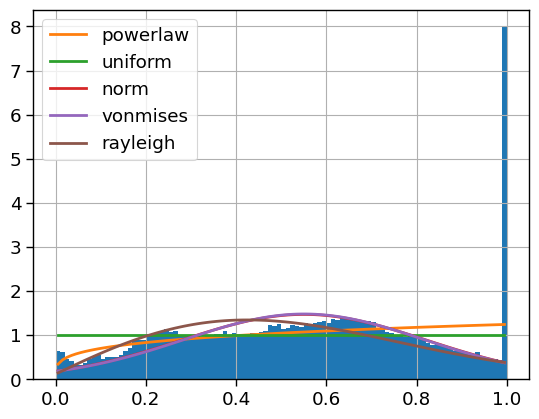

In [14]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='NPM', 'avg_ratio'].sort_values().to_numpy())

/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_outpu

              sumsquare_error        aic        bic    kl_div  ks_statistic  \
powerlaw           139.655178   6.541921  26.051203  0.128545      0.115727   
uniform            140.272340   3.890381  16.896569  0.137815      0.115213   
semicircular       154.966212  16.472285  29.478474  0.177954      0.099573   
anglit             159.530770  25.974445  38.980634  0.197267      0.103145   
rayleigh           160.786987  36.052299  49.058487  0.196556      0.082768   

                 ks_pvalue  
powerlaw      5.603872e-58  
uniform       1.819445e-57  
semicircular  5.290134e-43  
anglit        4.052161e-46  
rayleigh      7.916372e-30  
{'powerlaw': {'a': 0.9245690885367182, 'loc': 0.0005479452054793999, 'scale': 0.9994520547945207}}
{'uniform': {'loc': 0.0005479452054794, 'scale': 0.9994520547945206}}
{'uniform': {'loc': 0.0005479452054794, 'scale': 0.9994520547945206}}
{'lognorm': {'s': 0.1860695194598791, 'loc': -1.2675499954623104, 'scale': 1.7459609703136059}}
{'cauchy': {'loc

/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


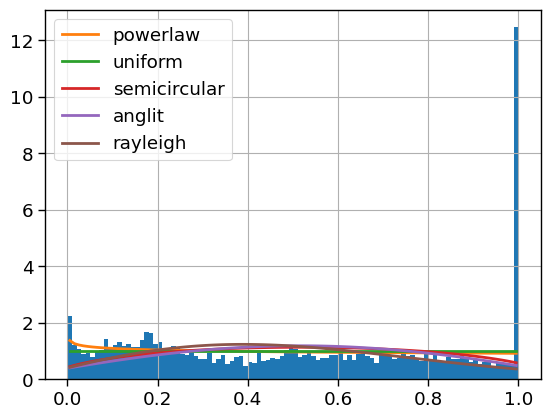

In [15]:
use_fitter(df_combined_maintained.loc[df_combined_maintained['system_name']=='PYPI', 'avg_ratio'].sort_values().to_numpy())

Fitting 111 distributions:   1%|          | 1/111 [00:03<06:35,  3.59s/it]2024-02-01 11:44:00.948 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-02-01 11:44:00.997 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▍         | 5/111 [00:35<07:58,  4.52s/it]2024-02-01 11:44:01.257 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED bradford distribution (taking more than 30 seconds)
2024-02-01 11:44:01.258 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED anglit distribution (taking more than 30 seconds)
Fitting 111 distributions:   7%|▋         | 8/111 [00:36<02:47,  1.62s/it]2024-02-01 11:44:01.381 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seconds)
2024-02-01 11:44:01.399 | WARNING  | fitter.fitter:_fit_single_distribution:34

          sumsquare_error        aic        bic    kl_div  ks_statistic  \
powerlaw        54.920980  10.640974  41.606575  0.098526      0.076044   
uniform         58.663888   3.946617  24.590351  0.109877      0.083399   
norm            62.414771  43.247132  63.890866  0.089384      0.048863   
vonmises        62.644317  46.108003  77.073604  0.090518      0.049268   
rayleigh        63.013004  37.936345  58.580079  0.091698      0.074509   

          ks_pvalue  
powerlaw        0.0  
uniform         0.0  
norm            0.0  
vonmises        0.0  
rayleigh        0.0  
{'powerlaw': {'a': 1.2381740675638646, 'loc': -0.0005868838882290703, 'scale': 1.0005868838882293}}
{'uniform': {'loc': 0.0002668801708033, 'scale': 0.9997331198291967}}
{'uniform': {'loc': 0.0002668801708033, 'scale': 0.9997331198291967}}
{'norm': {'loc': 0.5494780374322079, 'scale': 0.2720569628326589}}
{'expon': {'loc': 0.0002668801708033, 'scale': 0.5492111572614046}}


/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


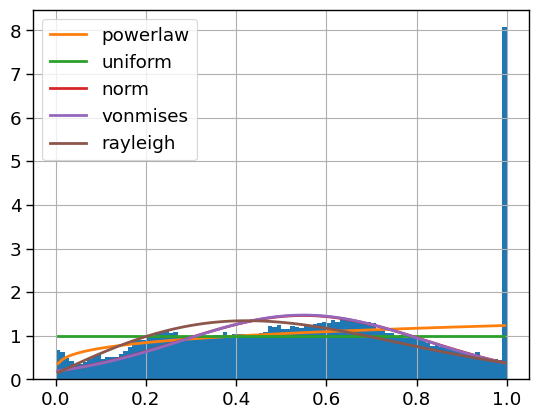

/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/Users/imranur/Research/security-metrics/secmet_venv/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_outpu

In [16]:
use_fitter(df_combined_maintained['avg_ratio'].sort_values().to_numpy())

/var/folders/gq/329v3h5j3lv50j_25gdv3d8m0000gq/T/ipykernel_32503/3928907312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=df_combined_maintained, x='avg_ratio', y='system_name', inner='quartile', palette='rainbow', cut=0)


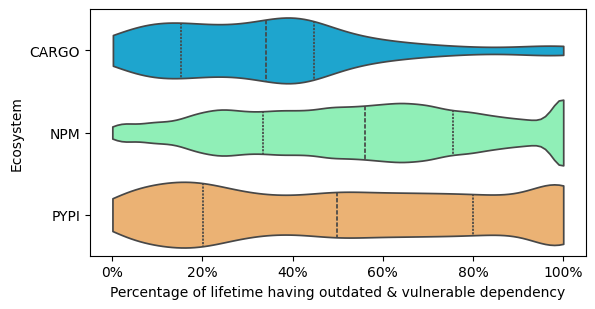

In [13]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained_ratio.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.violinplot(data=df_combined_maintained, x='avg_ratio', y='system_name', inner='quartile', palette='rainbow', cut=0)

ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Ecosystem')
ax.set_xlabel('Percentage of lifetime having outdated & vulnerable dependency')
# plt.title('Time out of date (maintained)\n')
plt.savefig(data_file, bbox_inches='tight')

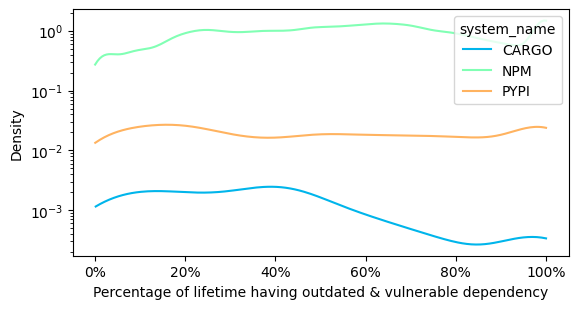

In [15]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "post_fix_exposure_time_combined_maintained_ratio_kde.pdf")
fig, ax = plt.subplots(figsize=(6.4, 3.2))
ax = sns.kdeplot(data=df_combined_maintained, x='avg_ratio', hue='system_name', palette='rainbow', cut=0)

ax.xaxis.set_major_formatter(formatter)
ax.set_ylabel('Density')
ax.set_xlabel('Percentage of lifetime having outdated & vulnerable dependency')
ax.set_yscale('log')
plt.savefig(data_file, bbox_inches='tight')

Cumulative Percentage Graph

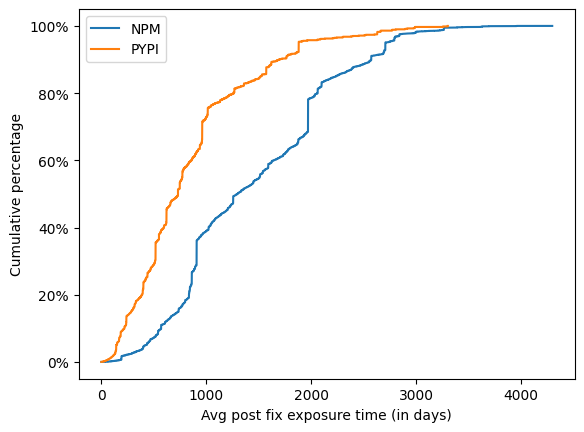

In [16]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "cum_percentage_maintained_pfet.pdf")

for system_name in df_combined_maintained.system_name.unique():
    df_cpg = df_combined_maintained[df_combined_maintained['system_name']==system_name].sort_values(by='avg_post_fix_exposure_time')
    df_cpg['cumulative_sum'] = df_cpg['avg_post_fix_exposure_time'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_post_fix_exposure_time'].sum()
    plt.plot(df_cpg['avg_post_fix_exposure_time'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
plt.xlabel('Avg post fix exposure time (in days)')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph (Maintained)')
plt.legend()
plt.savefig(data_file)

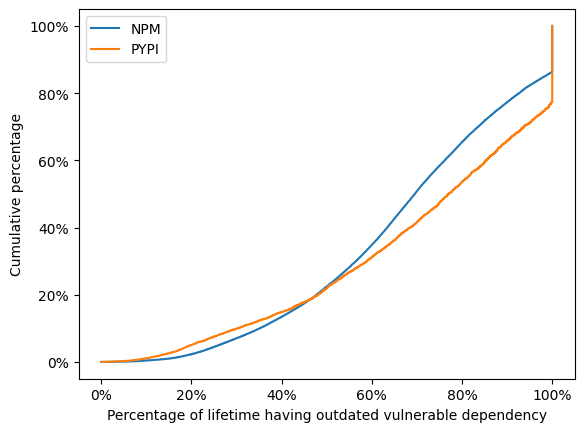

In [17]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "cum_percentage_maintained_ratio.pdf")

for system_name in df_combined_maintained.system_name.unique():
    df_cpg = df_combined_maintained[df_combined_maintained['system_name']==system_name].sort_values(by='avg_ratio')
    df_cpg['cumulative_sum'] = df_cpg['avg_ratio'].cumsum()
    df_cpg['cumulative_percentage'] = 100 * df_cpg['cumulative_sum'] / df_cpg['avg_ratio'].sum()
    plt.plot(df_cpg['avg_ratio'], df_cpg['cumulative_percentage'], drawstyle='steps', label=system_name)

ax.yaxis.set_major_formatter(append_percentage)
ax.xaxis.set_major_formatter(formatter)
plt.xlabel('Percentage of lifetime having outdated vulnerable dependency')
plt.ylabel('Cumulative percentage')
# plt.title('Cumulative Percentage Graph (Maintained)')
plt.legend()
plt.savefig(data_file)

# PFET vs # of major versions

In [18]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "post-fix-exposure-time-from-db"), "pfet_vs_major_versions.csv")
print (data_file)
df_pfet_major_versions = pd.read_csv(data_file,
                header=0,
                sep=';',
                on_bad_lines='skip',
                usecols=['system_name', 'num_of_major_versions', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet_major_versions.shape[0]
print (df_pfet_major_versions.shape)
display(df_pfet_major_versions.head())

/Users/imranur/Research/security-metrics/code/visualize-data/../../data/post-fix-exposure-time-from-db/pfet_vs_major_versions.csv
(168, 4)


,system_name,num_of_major_versions,avg_post_fix_exposure_time,avg_ratio
0,NPM,0,57.113612,0.042114
1,NPM,1,52.748680,0.027804
2,NPM,2,34.824690,0.020091
3,NPM,3,23.094813,0.014404
4,NPM,4,17.981344,0.011471


In [19]:
df_pfet_major_versions.groupby(by=['system_name']).describe()

num_of_major_versions                                           \
                            count       mean         std  min    25%   50%   
system_name                                                                  
NPM                         102.0  76.598039  158.755947  0.0  25.25  50.5   
PYPI                         66.0  64.424242  135.674844  0.0  16.25  32.5   

                           avg_post_fix_exposure_time             ...  \
               75%     max                      count       mean  ...   
system_name                                                       ...   
NPM          80.50  1516.0                      102.0  19.707425  ...   
PYPI         60.75   878.0                       66.0   3.674122  ...   

                                  avg_ratio                                \
                  75%         max     count      mean       std  min  25%   
system_name                                                                 
NPM          8.370585  863.000000     102.0  0.016818  0.076878  0.0  0.0   
PYPI         1.445208   66.142857      65.0  0.002527  0.006528  0.0  0.0   

                                          
                  50%      75%       max  
system_name                               
NPM          0.002929  0.00829  0.667440  
PYPI         0.000000  0.00177  0.037627  

[2 rows x 24 columns]

In [20]:
MAX_MAJOR_VERSION = 150
df_pfet_major_versions_small = df_pfet_major_versions[(df_pfet_major_versions['num_of_major_versions'] > 0) &
                                                        (df_pfet_major_versions['num_of_major_versions'] <= MAX_MAJOR_VERSION)]

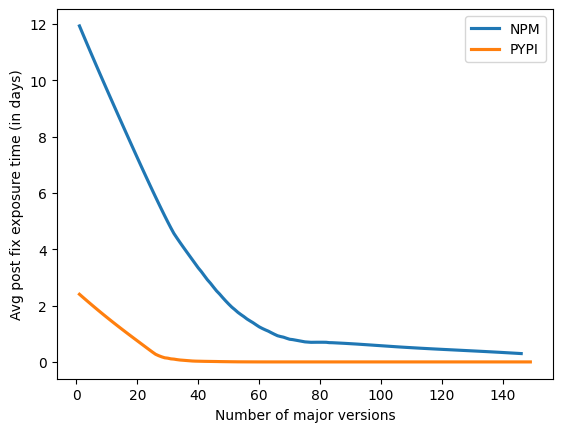

In [21]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_major_versions_small.system_name.unique():
    sns.regplot(df_pfet_major_versions_small[df_pfet_major_versions_small['system_name'] == system_name],
                x='num_of_major_versions',
                y='avg_post_fix_exposure_time',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to save the figure in pdf format
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_major_versions.pdf")
# plt.ylim(0.0, 1.0)


ax.set_ylabel('Avg post fix exposure time (in days)')
ax.set_xlabel('Number of major versions')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)

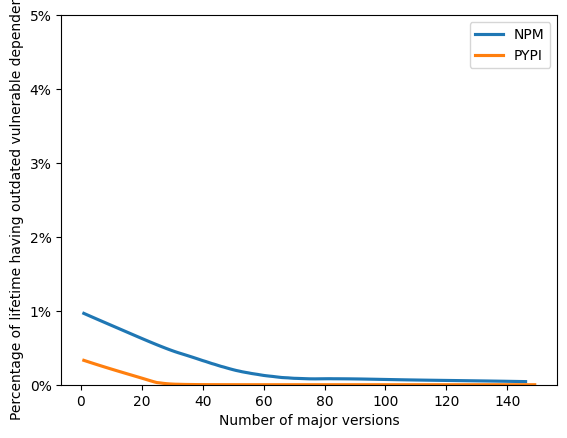

In [27]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_major_versions_small.system_name.unique():
    sns.regplot(df_pfet_major_versions_small[df_pfet_major_versions_small['system_name'] == system_name],
                x='num_of_major_versions',
                y='avg_ratio',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to save the figure in pdf format
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_major_versions_ratio.pdf")
plt.ylim(0.0, 0.05)

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Percentage of lifetime having outdated vulnerable dependency')
ax.set_xlabel('Number of major versions')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)

# PFET vs # of versions

In [28]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "post-fix-exposure-time-from-db"), "pfet_vs_versions.csv")
print (data_file)
df_pfet_versions = pd.read_csv(data_file,
                header=0,
                sep=';',
                on_bad_lines='skip',
                usecols=['system_name', 'num_of_versions', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet_versions.shape[0]
print (df_pfet_versions.shape)
display(df_pfet_versions.head())

/Users/imranur/Research/security-metrics/code/visualize-data/../../data/post-fix-exposure-time-from-db/pfet_vs_versions.csv
(2767, 4)


,system_name,num_of_versions,avg_post_fix_exposure_time,avg_ratio
0,NPM,1,59.903915,0.030669
1,NPM,2,60.998012,0.030577
2,NPM,3,60.431800,0.030273
3,NPM,4,57.889574,0.029470
4,NPM,5,53.973878,0.028427


In [29]:
df_pfet_versions.groupby(by=['system_name']).describe()

num_of_versions                                                 \
                      count         mean          std  min     25%     50%   
system_name                                                                  
NPM                  2115.0  1393.237825  1250.187461  1.0  529.50  1075.0   
PYPI                  652.0   472.599693   464.451864  1.0  163.75   338.0   

                             avg_post_fix_exposure_time            ...  \
                75%      max                      count      mean  ...   
system_name                                                        ...   
NPM          1852.0  11460.0                     2115.0  9.089174  ...   
PYPI          605.5   3755.0                      652.0  1.953680  ...   

                                  avg_ratio                                \
                  75%         max     count      mean       std  min  25%   
system_name                                                                 
NPM          9.317979  429.500000    2113.0  0.008789  0.024685  0.0  0.0   
PYPI         1.464158   73.055556     650.0  0.002805  0.010051  0.0  0.0   

                                           
                  50%       75%       max  
system_name                                
NPM          0.001426  0.010072  0.657986  
PYPI         0.000000  0.002476  0.149445  

[2 rows x 24 columns]

In [30]:
MAX_VERSIONS = 3000
df_pfet_versions_small = df_pfet_versions[(df_pfet_versions['num_of_versions'] >= 0) &
                                            (df_pfet_versions['num_of_versions'] <= MAX_VERSIONS)]

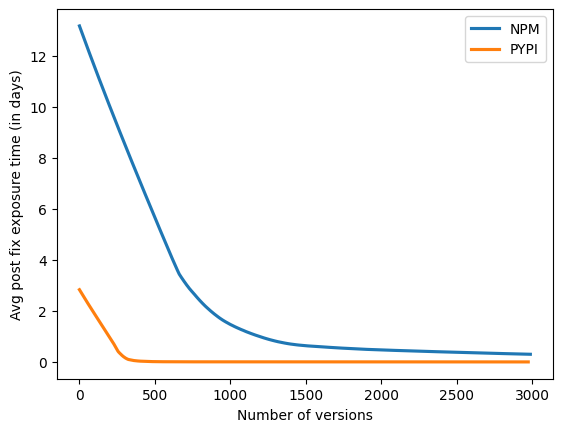

In [31]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_versions_small.system_name.unique():
    sns.regplot(df_pfet_versions_small[df_pfet_versions_small['system_name'] == system_name],
                x='num_of_versions',
                y='avg_post_fix_exposure_time',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to store the pdf
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_versions.pdf")

ax.set_ylabel('Avg post fix exposure time (in days)')
ax.set_xlabel('Number of versions')
ax.legend()
# plt.title('Time out of date (all pkgs)\n')
plt.savefig(data_file)

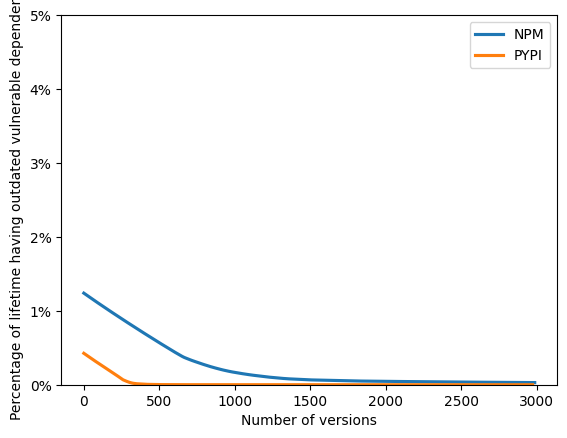

In [32]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_versions_small.system_name.unique():
    sns.regplot(df_pfet_versions_small[df_pfet_versions_small['system_name'] == system_name],
                x='num_of_versions',
                y='avg_ratio',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to save the figure in pdf format
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_versions_ratio.pdf")
plt.ylim(0.0, 0.05)

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Percentage of lifetime having outdated vulnerable dependency')
ax.set_xlabel('Number of versions')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)

# PFET vs dependencies

In [33]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "post-fix-exposure-time-from-db"), "pfet_vs_dependencies.csv")
print (data_file)
df_pfet_dependencies = pd.read_csv(data_file,
                header=0,
                sep=';',
                on_bad_lines='skip',
                usecols=['system_name', 'dependencies_approx', 'avg_post_fix_exposure_time', 'avg_ratio'],
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet_dependencies.shape[0]
print (df_pfet_dependencies.shape)
display(df_pfet_dependencies.head())

/Users/imranur/Research/security-metrics/code/visualize-data/../../data/post-fix-exposure-time-from-db/pfet_vs_dependencies.csv
(886, 4)


,system_name,dependencies_approx,avg_post_fix_exposure_time,avg_ratio
0,CARGO,1,0.0,0.0
1,CARGO,2,0.0,0.0
2,CARGO,3,0.0,0.0
3,CARGO,4,0.0,0.0
4,CARGO,5,0.0,0.0


In [34]:
df_pfet_dependencies.groupby(by=['system_name']).describe()

dependencies_approx                                              \
                          count        mean         std  min     25%    50%   
system_name                                                                   
CARGO                      28.0   15.785714   11.242634  1.0    7.75   14.5   
NPM                       717.0  422.570432  276.369560  1.0  180.00  394.0   
PYPI                      141.0   79.744681   58.278568  1.0   36.00   71.0   

                            avg_post_fix_exposure_time            ...  \
                75%     max                      count      mean  ...   
system_name                                                       ...   
CARGO         21.25    54.0                       28.0  0.000000  ...   
NPM          652.00  1119.0                      717.0  7.228939  ...   
PYPI         113.00   303.0                      141.0  6.490551  ...   

                                   avg_ratio                           \
                   75%         max     count      mean       std  min   
system_name                                                             
CARGO         0.000000    0.000000      28.0  0.000000  0.000000  0.0   
NPM          11.173168   58.499957     684.0  0.008116  0.010439  0.0   
PYPI          8.216529  100.175258     141.0  0.010292  0.010961  0.0   

                                                     
                  25%       50%       75%       max  
system_name                                          
CARGO        0.000000  0.000000  0.000000  0.000000  
NPM          0.001227  0.004898  0.012763  0.130227  
PYPI         0.003609  0.007588  0.012833  0.062232  

[3 rows x 24 columns]

TODO: The # of dependency calculation is not correct. We are now calculating the total # of unique dependencies a package used throughout its total lifetime (including dependencies used in only one version etc).

In [35]:
MAX_DEPENDENCIES = 300
df_pfet_dependencies_small = df_pfet_dependencies[(df_pfet_dependencies['dependencies_approx'] >= 0) &
                                                    (df_pfet_dependencies['dependencies_approx'] <= MAX_DEPENDENCIES)]

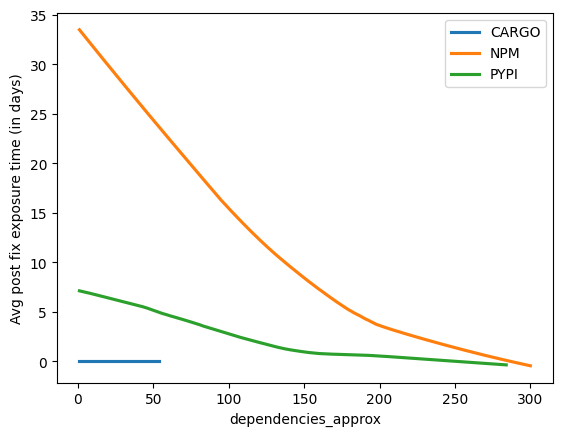

In [36]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_dependencies_small.system_name.unique():
    sns.regplot(df_pfet_dependencies_small[df_pfet_dependencies_small['system_name'] == system_name],
                x='dependencies_approx',
                y='avg_post_fix_exposure_time',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to store the pdf
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_dependencies.pdf")

ax.set_ylabel('Avg post fix exposure time (in days)')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)

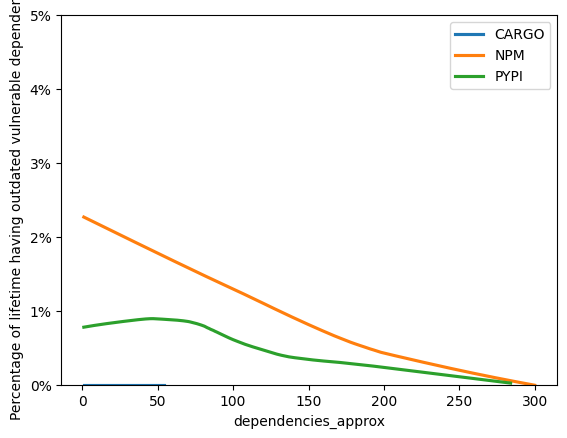

In [37]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_dependencies_small.system_name.unique():
    sns.regplot(df_pfet_dependencies_small[df_pfet_dependencies_small['system_name'] == system_name],
                x='dependencies_approx',
                y='avg_ratio',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to save the figure in pdf format
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_dependencies_ratio.pdf")
plt.ylim(0.0, 0.05)

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Percentage of lifetime having outdated vulnerable dependency')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)

# PFET vs dependents

In [38]:
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "data"), "post-fix-exposure-time-from-db"), "pfet_vs_dependents.csv")
print (data_file)
df_pfet_dependents = pd.read_csv(data_file,
                header=0,
                sep=';',
                on_bad_lines='skip',
                usecols=['system_name', 'dependents_approx', 'avg_post_fix_exposure_time', 'avg_ratio'],
                dtype={'dependents_approx':'Int64'}
                )
# df.columns = ['system_name', 'package_name', 'total_requirement_duration', 'post_fix_exposure_time', 'ratio', 'dependents_approx']
rows = df_pfet_dependents.shape[0]
print (df_pfet_dependents.shape)
display(df_pfet_dependents.head())

/Users/imranur/Research/security-metrics/code/visualize-data/../../data/post-fix-exposure-time-from-db/pfet_vs_dependents.csv
(8756, 4)


,system_name,dependents_approx,avg_post_fix_exposure_time,avg_ratio
0,CARGO,0,0.0,0.0
1,CARGO,1,0.0,0.0
2,CARGO,2,0.0,0.0
3,CARGO,3,0.0,0.0
4,CARGO,4,0.0,0.0


In [39]:
df_pfet_dependents.groupby(by=['system_name']).describe()

dependents_approx                                           \
                        count          mean           std  min     25%   
system_name                                                              
CARGO                   647.0   3082.704791   8516.300384  0.0   167.0   
NPM                    7351.0  21963.470276  54136.530516  0.0  1887.0   
PYPI                    757.0   2753.996037   6884.169365  0.0   192.0   

                                       avg_post_fix_exposure_time            \
                50%      75%       max                      count      mean   
system_name                                                                   
CARGO         476.0   1567.5  103586.0                      647.0  0.000000   
NPM          5263.0  18191.0  973859.0                     7352.0  4.633391   
PYPI          494.0   1665.0   76897.0                      757.0  0.653510   

             ...              avg_ratio                                     \
             ...  75%     max     count      mean       std  min  25%  50%   
system_name  ...                                                             
CARGO        ...  0.0     0.0     644.0  0.000000  0.000000  0.0  0.0  0.0   
NPM          ...  0.0  1298.0    7328.0  0.003301  0.021685  0.0  0.0  0.0   
PYPI         ...  0.0   100.4     754.0  0.000953  0.006663  0.0  0.0  0.0   

                            
             75%       max  
system_name                 
CARGO        0.0  0.000000  
NPM          0.0  1.000000  
PYPI         0.0  0.129049  

[3 rows x 24 columns]

In [40]:
MAX_DEPENDENTS = 70000
df_pfet_dependents_small = df_pfet_dependents[(df_pfet_dependents['dependents_approx'] >= 0) &
                                                (df_pfet_dependents['dependents_approx'] <= MAX_DEPENDENTS)]

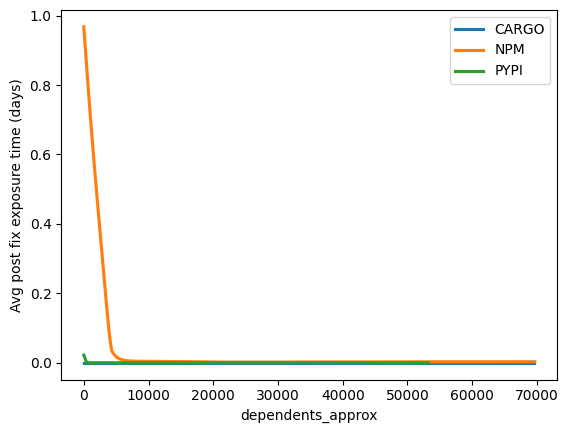

In [41]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_dependents_small.system_name.unique():
    sns.regplot(df_pfet_dependents_small[df_pfet_dependents_small['system_name'] == system_name],
                x='dependents_approx',
                y='avg_post_fix_exposure_time',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to store the pdf
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_dependents.pdf")

ax.set_ylabel('Avg post fix exposure time (days)')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)

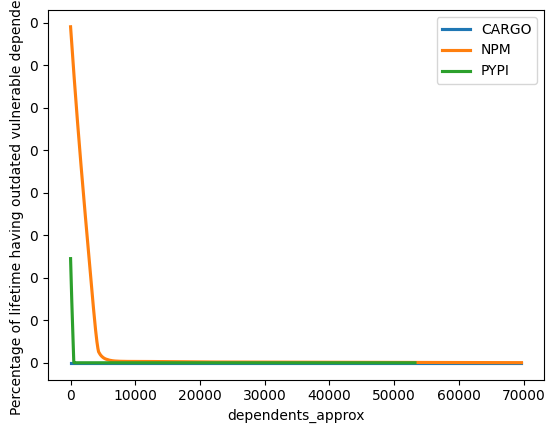

In [42]:
# create the figure and axes
fig, ax = plt.subplots(figsize=(6.4, 4.8))

for system_name in df_pfet_dependents_small.system_name.unique():
    sns.regplot(df_pfet_dependents_small[df_pfet_dependents_small['system_name'] == system_name],
                x='dependents_approx',
                y='avg_ratio',
                lowess=True,
                scatter=False,
                ax=ax,
                label=system_name)
# file to save the figure in pdf format
data_file = os.path.join(os.path.join(os.path.join(os.path.join(os.path.join(os.getcwd(), os.pardir), os.pardir), "results"), "post-fix-exposure-time-from-db"), "pfet_vs_dependents_ratio.pdf")
# plt.ylim(0.0, 1.0)

def formatter(x, pos):
    del pos
    return str(int(x*100))

ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Percentage of lifetime having outdated vulnerable dependency')
ax.legend()
# plt.title('Time out of date\n')
plt.savefig(data_file)